In [3]:
import pandas as pd


In [4]:
from textblob import TextBlob

# Load the cleaned data
df = pd.read_csv('../data/cleaned_reviews.csv')

# Perform sentiment analysis
df['Sentiment'] = df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Sentiment_Type'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Save analyzed data
df.to_csv('../data/analyzed_reviews.csv', index=False)
print("Sentiment analysis complete. Data saved to 'data/analyzed_reviews.csv'.")


Sentiment analysis complete. Data saved to 'data/analyzed_reviews.csv'.


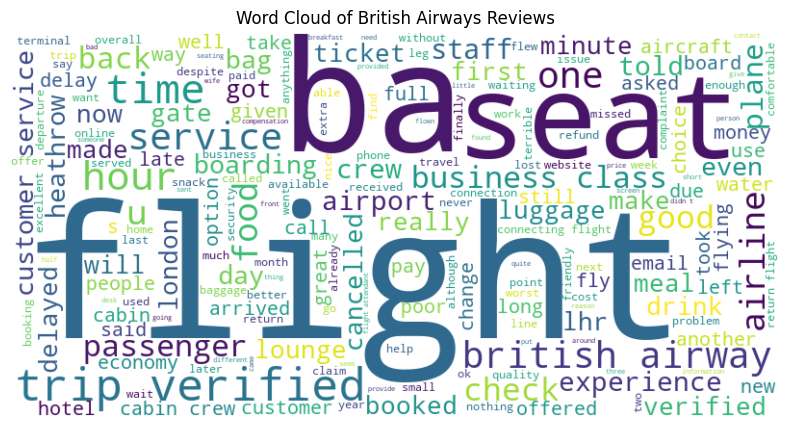

Word cloud saved to 'analysis/word_cloud.png'.


In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews into a single string
all_reviews = ' '.join(df['Review'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of British Airways Reviews")
plt.show()

# Save the word cloud
wordcloud.to_file('../analysis/word_cloud.png')
print("Word cloud saved to 'analysis/word_cloud.png'.")


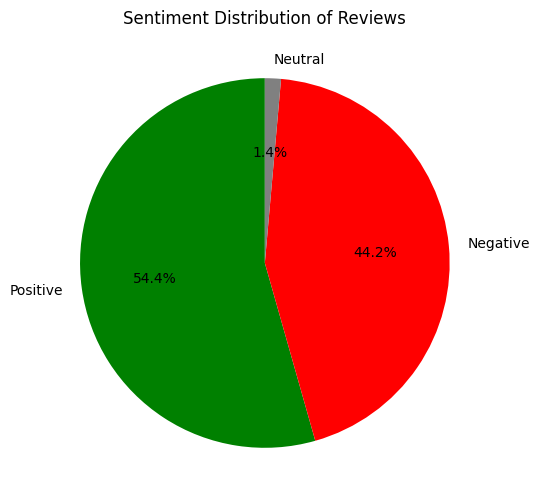

Sentiment distribution chart saved to 'analysis/sentiment_distribution.png'.


<Figure size 640x480 with 0 Axes>

In [7]:
# Import visualization library
import matplotlib.pyplot as plt

# Count sentiment types
sentiment_counts = df['Sentiment_Type'].value_counts()

# Plot sentiment distribution
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['green', 'red', 'gray'])
plt.title("Sentiment Distribution of Reviews")
plt.show()

# Save the pie chart
plt.savefig('../analysis/sentiment_distribution.png')
print("Sentiment distribution chart saved to 'analysis/sentiment_distribution.png'.")
